# Step Counter

* [1. Import Library](#1.-Import-Library)
* [2. Load Data](#2.-Load-Data)
* [3. Plot Data](#3.-Plot-Data)
* [4. Filter Data](#4.-Filter-Data)
* [5. Detect Peaks](#5.-Detect-Peaks)
* [6. Calculate Calorie](#6.-Calculate-Calorie)

### 1. Import Library

In [1]:
from glob import glob
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, lfilter
%matplotlib inline

### 2. Load Data
### 2.1. Accelerometer
#### 2.1.1. Get Filepaths with `glob`

In [2]:
filepaths = sorted(glob('data/accelerometer/*.csv'))
filepaths

['data/accelerometer/left_hand1.csv',
 'data/accelerometer/left_hand2.csv',
 'data/accelerometer/right_hand1.csv',
 'data/accelerometer/right_hand2.csv']

#### 2.1.2. Read Data with `pd.read_csv`
`df.head()` will return top 5 rows.

In [3]:
filepath = filepaths[0]
df = pd.read_csv(filepath)
df.head()

time     gFx     gFy     gFz    TgF
0  5.014 -0.6415 -0.6753  0.1064  0.938
1  5.014 -0.7915 -0.5771  0.1176  0.987
2  5.014 -0.7755 -0.5597  0.0701  0.959
3  5.015 -0.6608 -0.6224  0.0154  0.908
4  5.015 -0.6199 -0.6842 -0.0007  0.923

#### 2.1.3. Plot Data

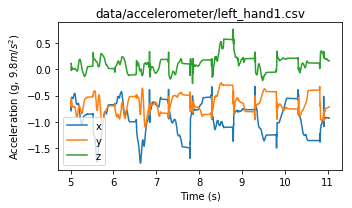

In [4]:
# Prepare X, Y data
X = df['time']
Y = df[['gFx', 'gFy', 'gFz']]

# Plot data
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(X, Y)
ax.legend('xyz')       # 범례
ax.set_title(filepath) # 제목
ax.set_xlabel('Time (s)') # x축 라벨
ax.set_ylabel('Acceleration (g, $9.8m/s^2$)') # y축 라벨
fig.tight_layout() # 정렬
fig.show()

### 2.2. Practice with Gyroscope [10분]

#### 2.2.1. Get Filepaths with `glob`

In [5]:
filepaths = sorted(glob('data/gyroscope/*.csv'))

#### 2.2.2. Read Data with `pd.read_csv`

In [6]:
df = pd.read_csv(filepaths[0])
df.head()

time  wx (rad/s)  wy (rad/s)  wz (rad/s)
0  4.904        0.03        0.29       -1.56
1  4.908        0.05        0.28       -1.53
2  4.909        0.07        0.28       -1.51
3  4.913        0.10        0.28       -1.48
4  4.914        0.12        0.27       -1.45

#### 2.1.3. Plot Data

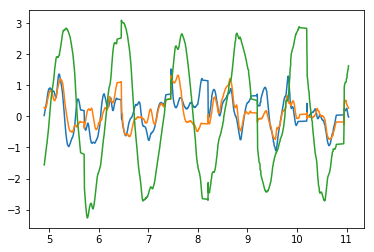

In [7]:
X = df['time']
Y = df[['wx (rad/s)', 'wy (rad/s)', 'wz (rad/s)']]

fig, ax = plt.subplots()
ax.plot(X, Y)

### 3. Plot Data
### 3.1. Accelerometer
#### 3.1.1. Plot XYZ acceleration
##### Single Plot

In [8]:
filepaths = sorted(glob('data/accelerometer/*.csv'))
filepaths

['data/accelerometer/left_hand1.csv',
 'data/accelerometer/left_hand2.csv',
 'data/accelerometer/right_hand1.csv',
 'data/accelerometer/right_hand2.csv']

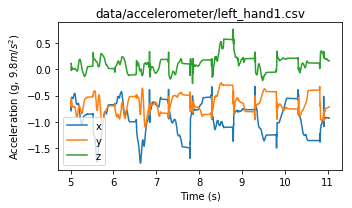

In [9]:
filepath = filepaths[0]

# Single graph
fig, ax = plt.subplots(figsize=(5,3))

# Load data
df = pd.read_csv(filepath)
X = df['time']
Y = df[['gFx', 'gFy', 'gFz']]

# Plot data
ax.plot(X, Y)
ax.set_title(filepath)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration (g, $9.8m/s^2$)')
ax.legend('xyz')
fig.tight_layout()
fig.show()

##### Multiple Plots

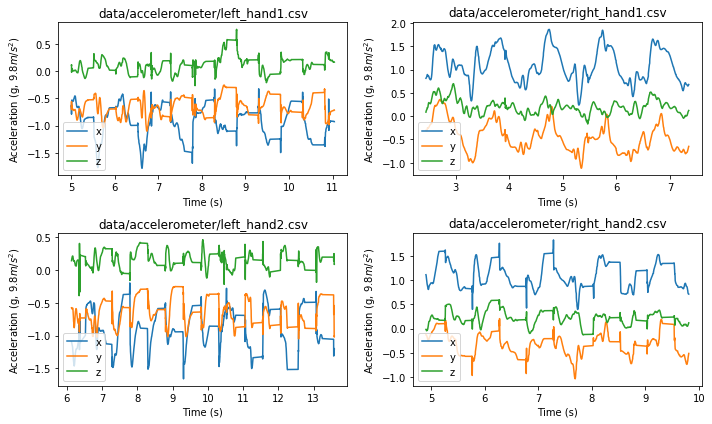

In [10]:
# Multiple graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

for idx, filepath in enumerate(filepaths):
    # Load data
    df = pd.read_csv(filepath)
    X = df['time']
    Y = df[['gFx', 'gFy', 'gFz']]
    
    # Plot data
    ax = axes[idx%2][idx//2]
    ax.plot(X, Y)
    ax.set_title(filepath)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Acceleration (g, $9.8m/s^2$)')
    ax.legend('xyz')
fig.tight_layout()
fig.show()

#### 3.1.2. Plot Size of Acceleration

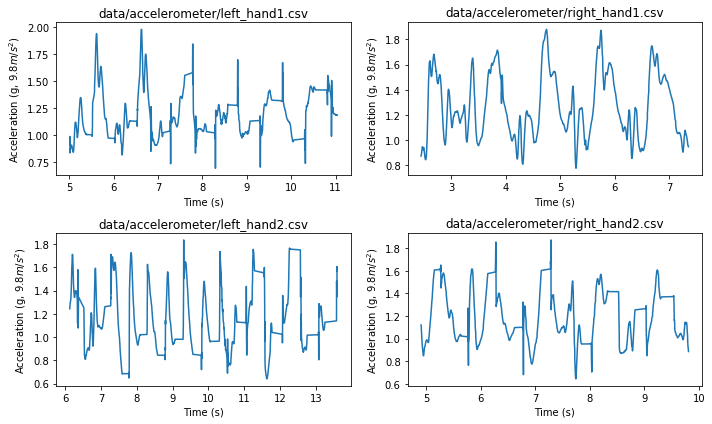

In [11]:
# Multiple graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

for idx, filepath in enumerate(filepaths):
    # Load data
    df = pd.read_csv(filepath)
    X = df['time']
    Y = np.linalg.norm(df[['gFx', 'gFy', 'gFz']], axis=1)
    
    # Plot data
    ax = axes[idx%2][idx//2]
    ax.plot(X, Y)
    ax.set_title(filepath)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Acceleration (g, $9.8m/s^2$)')
fig.tight_layout()
fig.show()

### 3.2. Practice with Gyroscope [5분]

#### 3.2.1. Plot XYZ angular velocity

In [12]:
filepaths = sorted(glob('data/gyroscope/*.csv'))
filepaths

['data/gyroscope/left_hand1.csv',
 'data/gyroscope/left_hand2.csv',
 'data/gyroscope/right_hand1.csv',
 'data/gyroscope/right_hand2.csv']

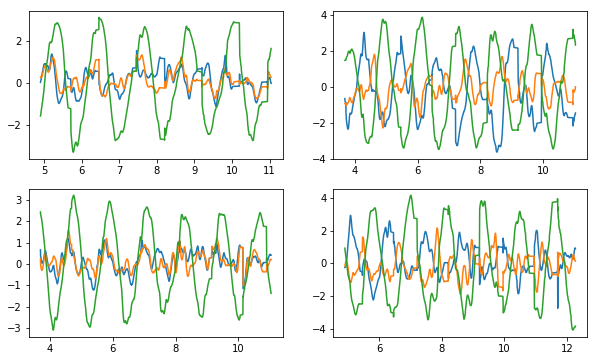

In [13]:
# Create graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

for idx, filepath in enumerate(filepaths):
    df = pd.read_csv(filepath)
    X = df['time']
    Y = df[['wx (rad/s)','wy (rad/s)','wz (rad/s)']]
    
    # Select and plot single graph
    ax = axes[idx%2][idx//2]
    ax.plot(X, Y)

#### 3.2.2. Plot Size of XYZ angular velocity

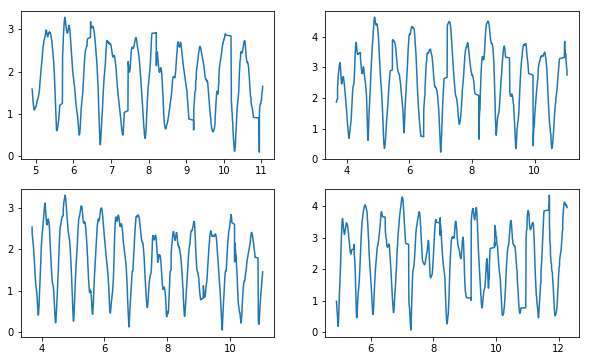

In [14]:
# Create graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

for idx, filepath in enumerate(filepaths):
    df = pd.read_csv(filepath)
    X = df['time']
    Y = df[['wx (rad/s)','wy (rad/s)','wz (rad/s)']]
    Y = np.linalg.norm(Y, axis=1) # 3축 => 1축
    
    # Select and plot single graph
    ax = axes[idx%2][idx//2]
    ax.plot(X, Y)

### 4. Filter Data
### 4.1. Accelerometer
#### 4.1.1. Moving Average Filter

In [15]:
def moving_average_filter(Y, window_size):
    # Original length
    length = Y.shape[0]
    
    # Filtered length
    filtered_length = length - (window_size - 1)
    
    # Get moving average
    Y_filtered = []
    for i in range(filtered_length):
        s = np.mean(Y[i:i+window_size])
        Y_filtered.append(s)
        
    return np.array(Y_filtered)

In [16]:
filepaths = sorted(glob('data/accelerometer/*.csv'))
filepaths

['data/accelerometer/left_hand1.csv',
 'data/accelerometer/left_hand2.csv',
 'data/accelerometer/right_hand1.csv',
 'data/accelerometer/right_hand2.csv']

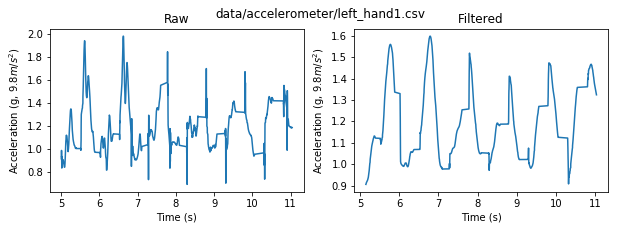

In [17]:
window_size = 100

# Load data
filepath = filepaths[0]
df = pd.read_csv(filepath)
X = df['time']

# Get size of acceleration
Y = np.linalg.norm(df[['gFx', 'gFy', 'gFz']], axis=1)

# Filter data
Y_filtered = moving_average_filter(Y, window_size)

# Plot data
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

axes[0].plot(X, Y)
axes[1].plot(X[window_size - 1:], Y_filtered)

axes[0].set_title('Raw')
axes[1].set_title('Filtered')
for ax in axes:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Acceleration (g, $9.8m/s^2$)')
fig.suptitle(filepath)
fig.show()

#### 4.1.2. Median Filter [10분]

In [18]:
def median_filter(Y, window_size):
    # Original length
    length = Y.shape[0]
    
    # Filtered length
    filtered_length = length - (window_size - 1)
    
    # Get median
    Y_filtered = []
    for i in range(filtered_length):
        s = np.median(Y[i:i+window_size])
        Y_filtered.append(s)
        
    return np.array(Y_filtered)

In [19]:
filepaths = sorted(glob('data/accelerometer/*.csv'))

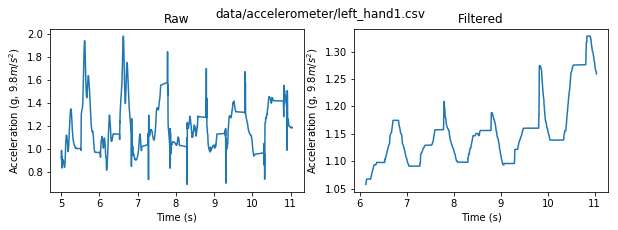

In [20]:
window_size = 500

# Load data
filepath = filepaths[0]
df = pd.read_csv(filepath)
X = df['time']

# Get size of acceleration
Y = np.linalg.norm(df[['gFx', 'gFy', 'gFz']], axis=1)

# Filter data
Y_filtered = median_filter(Y, window_size)

# Plot data
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
axes[0].plot(X, Y)
axes[1].plot(X[window_size - 1:], Y_filtered)
axes[0].set_title('Raw')
axes[1].set_title('Filtered')
for ax in axes:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Acceleration (g, $9.8m/s^2$)')
fig.suptitle(filepath)
fig.show()

#### 4.1.3. Low Pass Filter

In [23]:
def low_pass_filter(data, threshold, order=5):
    b, a = butter(order, threshold, btype='low')
    return lfilter(b, a, data)

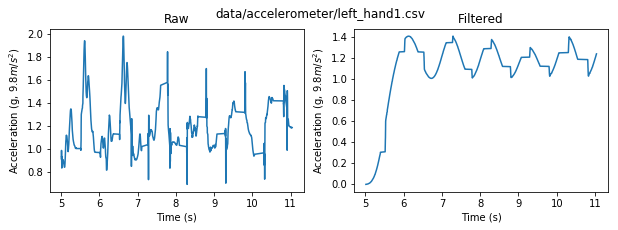

In [24]:
# Load data
filepath = filepaths[0]
df = pd.read_csv(filepath)
X = df['time']

# Get size of acceleration
Y = np.linalg.norm(df[['gFx', 'gFy', 'gFz']], axis=1)

# Filter data
fs = X.shape[0] / (X.iloc[-1] - X.iloc[0])
Y_filtered = low_pass_filter(Y, 2/fs)

# Plot data
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
axes[0].plot(X, Y)
axes[1].plot(X, Y_filtered)
axes[0].set_title('Raw')
axes[1].set_title('Filtered')
for ax in axes:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Acceleration (g, $9.8m/s^2$)')
fig.suptitle(filepath)
fig.show()

### 4.2. Practice with Gyroscope
#### 4.2.1. Moving Average Filter [10분]

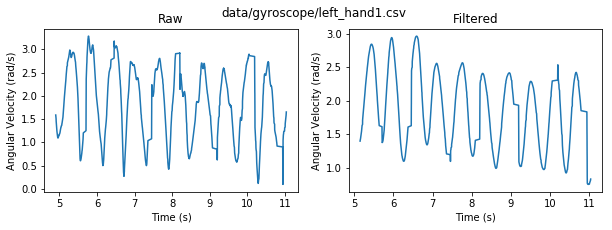

In [26]:
# 1. Load data
filepaths = sorted(glob('data/gyroscope/*.csv'))
filepath = filepaths[0]
df = pd.read_csv(filepath)
X = df['time']
Y = np.linalg.norm(df[['wx (rad/s)','wy (rad/s)','wz (rad/s)']], axis=1)

# 2. Filter data
window_size = 100
Y_filtered = moving_average_filter(Y, window_size)

# 3. Plot data
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
axes[0].plot(X, Y)
axes[1].plot(X[window_size - 1:], Y_filtered)
axes[0].set_title('Raw')
axes[1].set_title('Filtered')
for ax in axes:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Angular Velocity (rad/s)')
fig.suptitle(filepath)
fig.show()

#### 4.2.2. Median Filter [Try yourself]

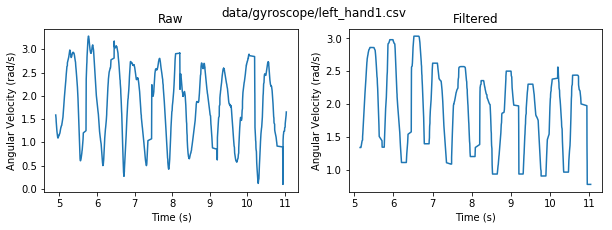

In [27]:
# 1. Load data
filepaths = sorted(glob('data/gyroscope/*.csv'))
filepath = filepaths[0]
df = pd.read_csv(filepath)
X = df['time']
Y = np.linalg.norm(df[['wx (rad/s)','wy (rad/s)','wz (rad/s)']], axis=1)

# 2. Filter data
window_size = 100
Y_filtered = median_filter(Y, window_size)

# 3. Plot data
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
axes[0].plot(X, Y)
axes[1].plot(X[window_size - 1:], Y_filtered)
axes[0].set_title('Raw')
axes[1].set_title('Filtered')
for ax in axes:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Angular Velocity (rad/s)')
fig.suptitle(filepath)
fig.show()

#### 4.2.3. Low Pass Filter [Try yourself]

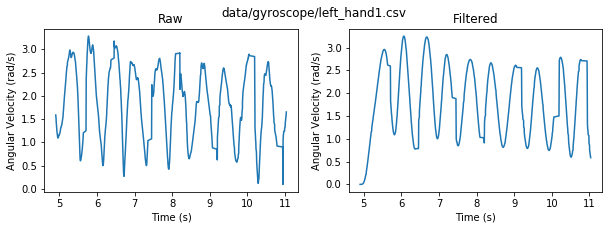

In [31]:
# 1. Load data
filepaths = sorted(glob('data/gyroscope/*.csv'))
filepath = filepaths[0]
df = pd.read_csv(filepath)
X = df['time']
Y = np.linalg.norm(df[['wx (rad/s)','wy (rad/s)','wz (rad/s)']], axis=1)

# 2. Filter data
fs = X.shape[0] / (X.iloc[-1] - X.iloc[0])
Y_filtered = low_pass_filter(Y, 5/fs)

# 3. Plot data
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
axes[0].plot(X, Y)
axes[1].plot(X, Y_filtered)
axes[0].set_title('Raw')
axes[1].set_title('Filtered')
for ax in axes:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Angular Velocity (rad/s)')
fig.suptitle(filepath)
fig.show()

### 5. Detect Peaks
### 5.1. Standard Deviation Based
#### 5.1.1. Accelerometer

In [34]:
filepaths = sorted(glob('data/accelerometer/*.csv'))

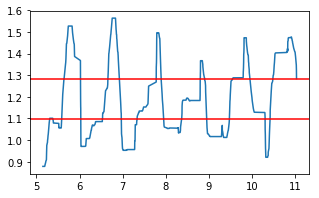

In [35]:
window_size = 100

# Load data
filepath = filepaths[0]
df = pd.read_csv(filepath)
X = df['time']

# Get size of acceleration
Y = np.linalg.norm(df[['gFx', 'gFy', 'gFz']], axis=1)

# Filter data
Y_filtered = median_filter(Y, window_size)

# Set thresholds
mean, std = np.mean(Y_filtered), np.std(Y_filtered)
low_threshold, high_threshold = mean - 0.5*std, mean + 0.5*std

# Plot data and thresholds
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(X[window_size - 1:], Y_filtered)
ax.axhline(y=low_threshold, color='r')
ax.axhline(y=high_threshold, color='r')
fig.show()

#### Implement `count_peaks` function [10분]

In [36]:
def count_peaks(Y):
    mean, std = np.mean(Y), np.std(Y)
    low_threshold, high_threshold = mean - 0.5*std, mean + 0.5*std

    def get_status(y):
        if y > high_threshold:
            return 'high'
        elif y > low_threshold:
            return 'middle'
        else:
            return 'low'
    
    count = 0
    # Count number of higher parts
    prev_status = get_status(Y[0])
    for y in Y[1:]:
        curr_status = get_status(y)
        
        if prev_status == 'middle' and curr_status == 'high':
            count += 1
        
        prev_status = curr_status
    
    return count

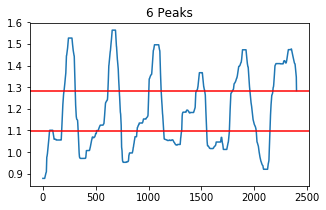

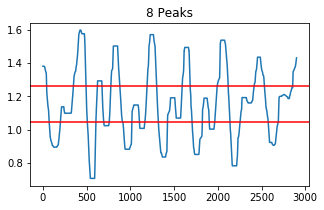

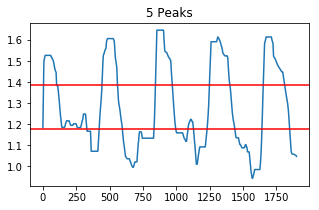

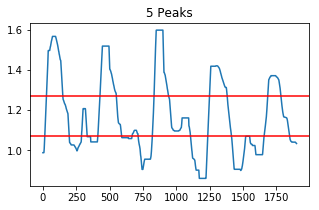

In [37]:
window_size = 100

for filepath in filepaths:
    # Load data
    df = pd.read_csv(filepath)
    
    # Get size of acceleration
    Y = np.linalg.norm(df[['gFx', 'gFy', 'gFz']], axis=1)
    
    # Filter data
    Y = median_filter(Y, window_size)
    
    # Count peaks
    count = count_peaks(Y)
    
    # Get thresholds
    mean, std = np.mean(Y), np.std(Y)
    low_threshold, high_threshold = mean - 0.5*std, mean + 0.5*std
    
    # Plot data and thresholds
    fig, ax = plt.subplots(figsize=(5,3))
    ax.plot(Y)
    ax.set_title(f'{count} Peaks')
    ax.axhline(y=low_threshold, color='r')
    ax.axhline(y=high_threshold, color='r')
    plt.show()

#### 5.1.2. Practice with Gyroscope [10분]

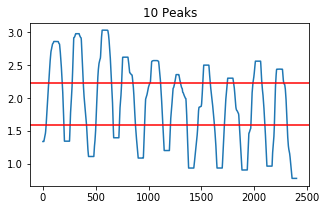

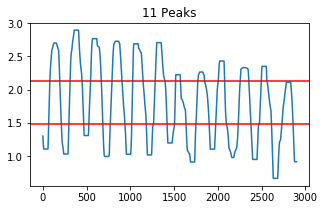

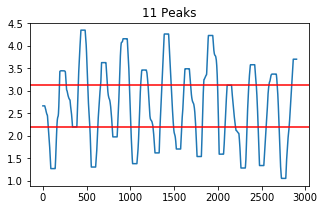

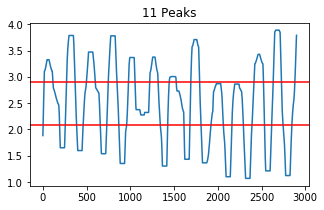

In [41]:
# Count peaks of gyroscope data using `count_peaks` function
window_size = 100

filepaths = sorted(glob('data/gyroscope/*.csv'))
for filepath in filepaths:
    # Load data
    df = pd.read_csv(filepath)
    
    # Get size of acceleration
    Y = np.linalg.norm(df[['wx (rad/s)','wy (rad/s)','wz (rad/s)']], axis=1)
    
    # Filter data
    Y = median_filter(Y, window_size)
    
    # Count peaks
    count = count_peaks(Y)
    
    # Get thresholds
    mean, std = np.mean(Y), np.std(Y)
    low_threshold, high_threshold = mean - 0.5*std, mean + 0.5*std
    
    # Plot data and thresholds
    fig, ax = plt.subplots(figsize=(5,3))
    ax.plot(Y)
    ax.set_title(f'{count} Peaks')
    ax.axhline(y=low_threshold, color='r')
    ax.axhline(y=high_threshold, color='r')
    plt.show()

### 5.2. FFT Based
#### 5.2.1. Accelerometer

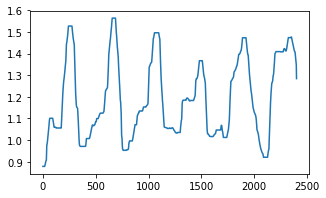

In [43]:
filepaths = sorted(glob('data/accelerometer/*.csv'))

window_size = 100

# Load data
filepath = filepaths[0]
df = pd.read_csv(filepath)
X = df['time']

# Get size of acceleration
Y = np.linalg.norm(df[['gFx', 'gFy', 'gFz']], axis=1)

# Filter data
Y_filtered = median_filter(Y, window_size)

# Plot data
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(Y_filtered)
fig.show()

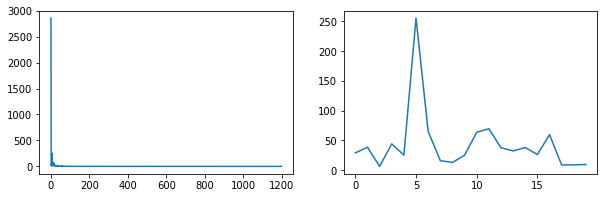

In [44]:
fig, ax = plt.subplots(ncols=2, figsize=(10,3))
ax[0].plot(np.abs(np.fft.rfft(Y_filtered)))       # Plot all values after FFT
ax[1].plot(np.abs(np.fft.rfft(Y_filtered))[1:21]) # Plot 1~20 values after FFT
fig.show()

In [45]:
def count_peaks_with_fft(Y):
    Y_fft = np.abs(np.fft.rfft(Y))[1:]
    count = np.argmax(Y_fft, axis=0) + 1
    return count

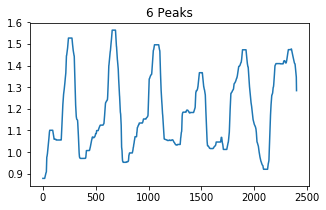

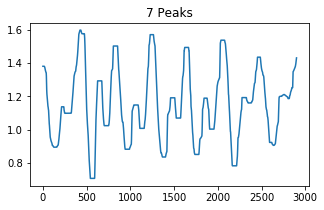

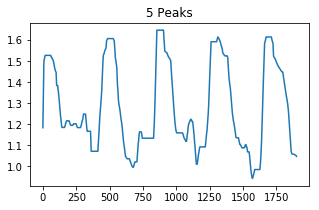

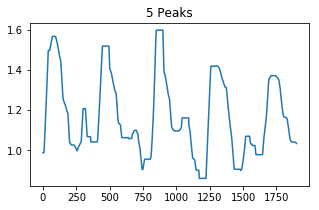

In [46]:
window_size = 100
for filepath in filepaths:
    # Load data
    df = pd.read_csv(filepath)
    
    # Get size of acceleration
    Y = np.linalg.norm(df[['gFx', 'gFy', 'gFz']], axis=1)
    
    # Filter data
    Y = median_filter(Y, window_size)
    
    # Count peaks
    count = count_peaks_with_fft(Y)
    
    # Plot data
    fig, ax = plt.subplots(figsize=(5,3))
    ax.plot(Y)
    ax.set_title(f'{count} Peaks')
    plt.show()

#### 5.2.2. Practice with Gyroscope [10분]

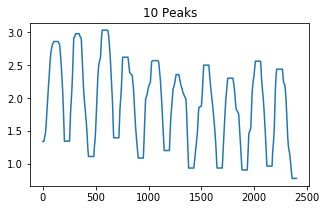

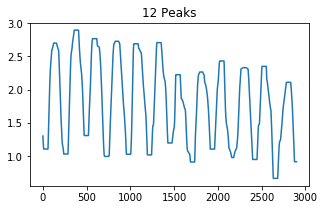

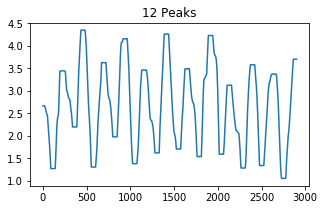

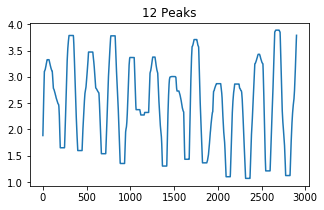

In [47]:
# Count peaks of gyroscope data using `count_peaks_with_fft` function
filepaths = sorted(glob('data/gyroscope/*.csv'))

window_size = 100
for filepath in filepaths:
    # Load data
    df = pd.read_csv(filepath)
    
    # Get size of acceleration
    Y = np.linalg.norm(df[['wx (rad/s)','wy (rad/s)','wz (rad/s)']], axis=1)
    
    # Filter data
    Y = median_filter(Y, window_size)
    
    # Count peaks
    count = count_peaks_with_fft(Y)
    
    # Plot data
    fig, ax = plt.subplots(figsize=(5,3))
    ax.plot(Y)
    ax.set_title(f'{count} Peaks')
    plt.show()

### 6. Calculate Calorie [10분]
$distance = \# steps \times stride$<br/>
$speed = \dfrac{distance}{seconds}$<br/>
$Calories = \alpha \times speed \times distance \times weights$

In [50]:
def step_to_cal(steps, stride, seconds, weights, alpha=0.12):
    """
    Parameters
    ----------
    steps : int
    stride : float (m)
    seconds : float (s)
    weights : float (kg)
    
    calories : kcal
    """
    distance = steps * stride / 1e3               # Unit: km
    speed = distance / (seconds / 3600)           # Unit : km/h
    calories = alpha * speed * distance * weights # Unit : kcal
    return calories

In [51]:
step_to_cal(10000, 0.3, 3600, 70)

75.60000000000001